In [1]:
#구글드라이브 csv 공유파일 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="https://drive.google.com/file/d/1cugqUx6N_sO7YGRzXBln-VGLZxUs9LKc/view?usp=share_link"
path='https://drive.google.com/uc?id='+url.split('/')[-2]
print("▶ 공유파일 링크변환 경로명 : ", path)

▶ 공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=1cugqUx6N_sO7YGRzXBln-VGLZxUs9LKc


In [2]:
df=pd.read_csv(path)
df.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


# 생산로트 군집화

In [3]:
zero_point = df.index[df['MELT_WEIGHT'] == 0].tolist()
zero_point

[406,
 445,
 908,
 1406,
 1408,
 2540,
 3034,
 3538,
 4062,
 4586,
 5081,
 5580,
 6103,
 6645,
 7147,
 7658,
 8143,
 8673,
 9280,
 9884,
 10494,
 11065,
 11067,
 11668,
 12243,
 12807,
 13361,
 13957,
 14550,
 15163,
 15772,
 16364,
 16939,
 17517,
 18093,
 18648,
 19222,
 19743,
 20269,
 20889,
 21497,
 22074,
 22676,
 23310,
 23920,
 23922,
 24520,
 25135,
 25927,
 26507,
 27064,
 27597,
 28144,
 28678,
 29203,
 29760,
 30302,
 30845,
 31881,
 32431,
 32929,
 33437,
 33980,
 34469,
 35140,
 35683,
 36174,
 36715,
 37290,
 37833,
 38359,
 38936,
 39607,
 40198,
 40804,
 41904,
 42499,
 43094,
 43698,
 44311,
 44917,
 44919,
 45552,
 46124,
 46739,
 47348,
 47951,
 48562,
 49175,
 49805,
 50433,
 51076,
 51701,
 52330,
 52941,
 53563,
 54145,
 54736,
 55352,
 55354,
 55952,
 56547,
 57703,
 57705,
 58298,
 58880,
 59463,
 60068,
 60642,
 61259,
 61857,
 61859,
 62464,
 63674,
 64273,
 64855,
 65434,
 66011,
 66627,
 67214,
 67771,
 68324,
 68872,
 69415,
 69977,
 70609,
 71174,
 71743,

In [4]:
st = 0
li = []
for i in range(len(zero_point)):
    globals()['rot_'+str(i+1)] = df.loc[st:zero_point[i]-1]
    li.append('rot_'+str(i+1))
    st = zero_point[i]
globals()['rot_'+str(len(zero_point)+1)] = df.loc[zero_point[-1]:]
li.append('rot_'+str(len(zero_point)+1))

In [5]:
rot_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
445,2020-03-04 0:44,445,794,1729,0,3.22,OK
446,2020-03-04 0:44,446,364,210,196,3.18,OK
447,2020-03-04 0:44,447,470,190,198,3.20,OK
448,2020-03-04 0:44,448,445,63,202,3.19,OK
449,2020-03-04 0:44,449,491,114,208,3.19,OK
...,...,...,...,...,...,...,...
903,2020-03-04 1:30,903,410,224,9,3.19,OK
904,2020-03-04 1:30,904,787,1743,99,3.21,OK
905,2020-03-04 1:30,905,792,1740,8,3.22,OK
906,2020-03-04 1:30,906,394,202,9,3.18,OK


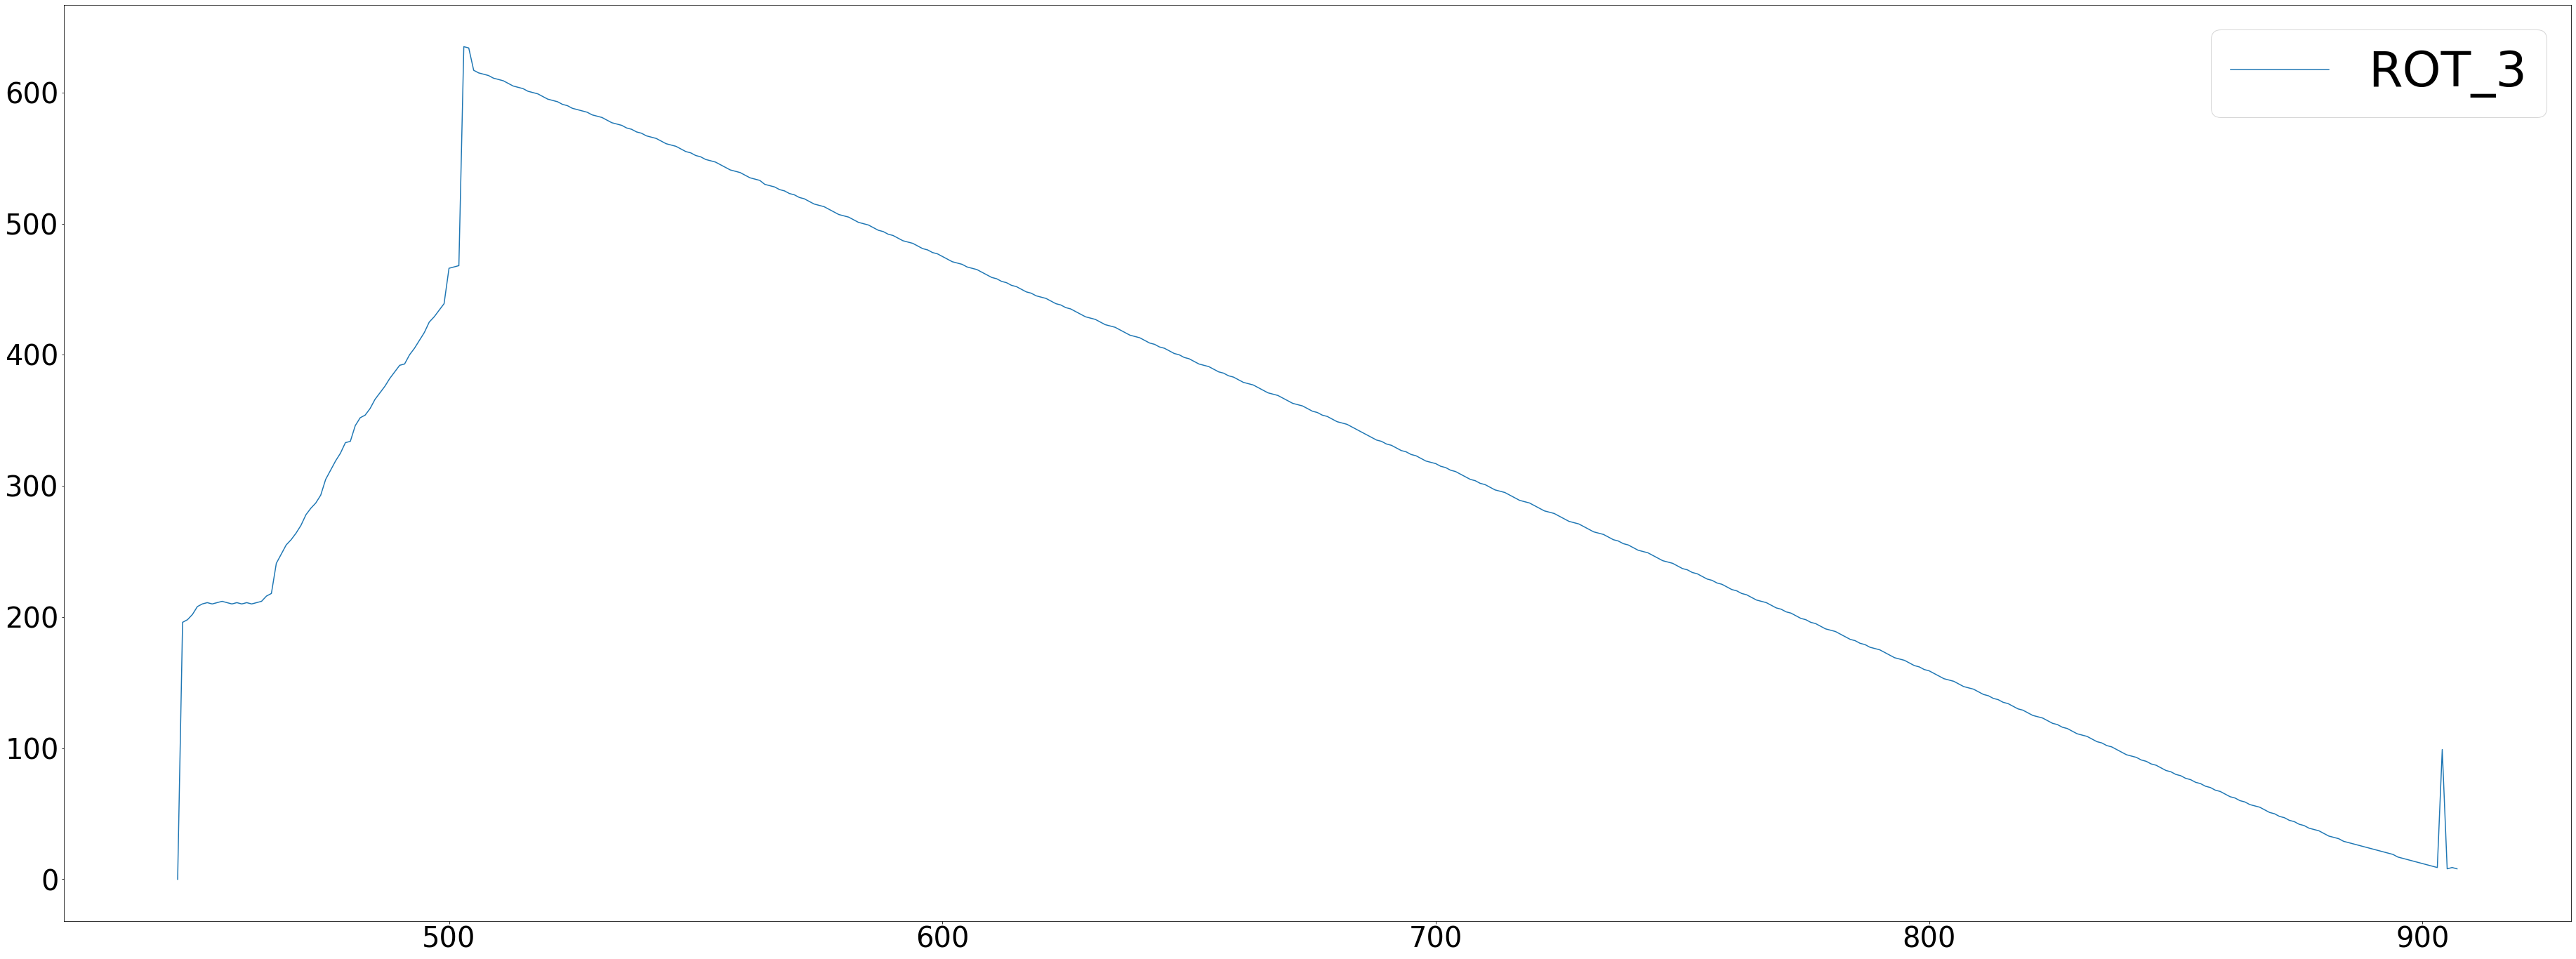

In [6]:
plt.figure(figsize=(64,24))
plt.plot(rot_3['MELT_WEIGHT'], label='ROT_3')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(prop={'size': 70})

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

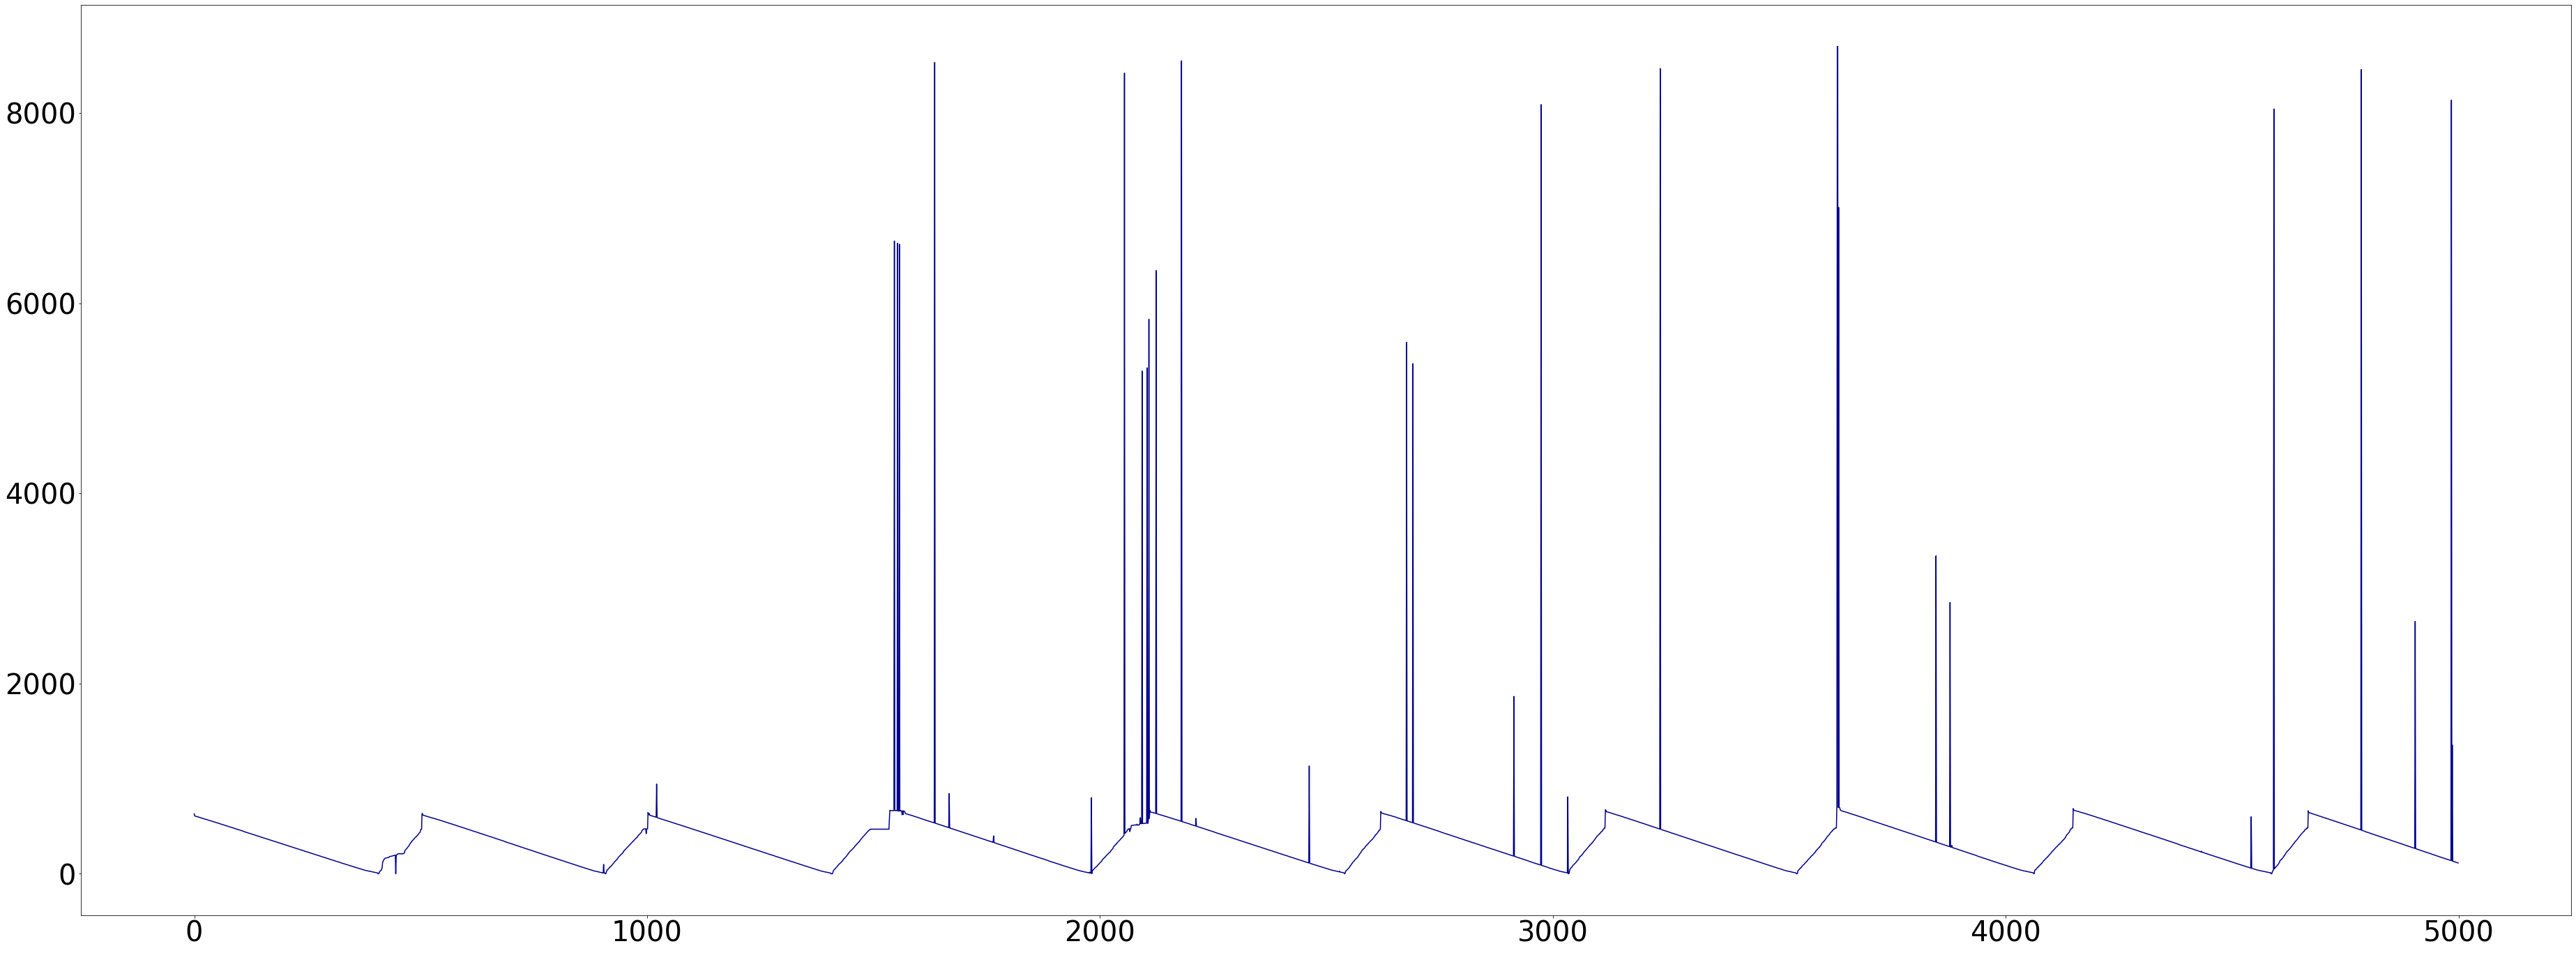

In [7]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][:5000], color='darkblue')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

# MELT_WEIGHT 1차 전처리

In [8]:
for i in range(len(df)):
    if df['MELT_WEIGHT'][i] >= 52727:
        df['MELT_WEIGHT'][i] = 0.01*df['MELT_WEIGHT'][i]
        
    elif 52726 >= df['MELT_WEIGHT'][i] >= 28112:
        df['MELT_WEIGHT'][i] = np.NAN
        
    elif 28111 >= df['MELT_WEIGHT'][i] >= 28078:
        df['MELT_WEIGHT'][i] = 0.1*(df['MELT_WEIGHT'][i]-8000)
        
    elif 28077 >= df['MELT_WEIGHT'][i] >= 22425:
        df['MELT_WEIGHT'][i] = np.NAN
        
    elif 22424 >= df['MELT_WEIGHT'][i] >= 10000:
        df['MELT_WEIGHT'][i] = 0.1*df['MELT_WEIGHT'][i]
        
    elif 9999 >= df['MELT_WEIGHT'][i] >= 8946:
        df['MELT_WEIGHT'][i] = np.NAN
        
    elif 8945 >= df['MELT_WEIGHT'][i] >= 8000:
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i]-8000
        
    elif 7999 >= df['MELT_WEIGHT'][i] >= 2911:
        df['MELT_WEIGHT'][i] = 0.1*df['MELT_WEIGHT'][i]

<ipython-input-8-f4603bbaf463>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = 0.1*df['MELT_WEIGHT'][i]
<ipython-input-8-f4603bbaf463>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i]-8000
<ipython-input-8-f4603bbaf463>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = np.NAN
C:\Users\82102\anaconda3\lib\site-packages\pandas\core\indexing.py:16

In [9]:
max(df['MELT_WEIGHT'])

2898.0

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

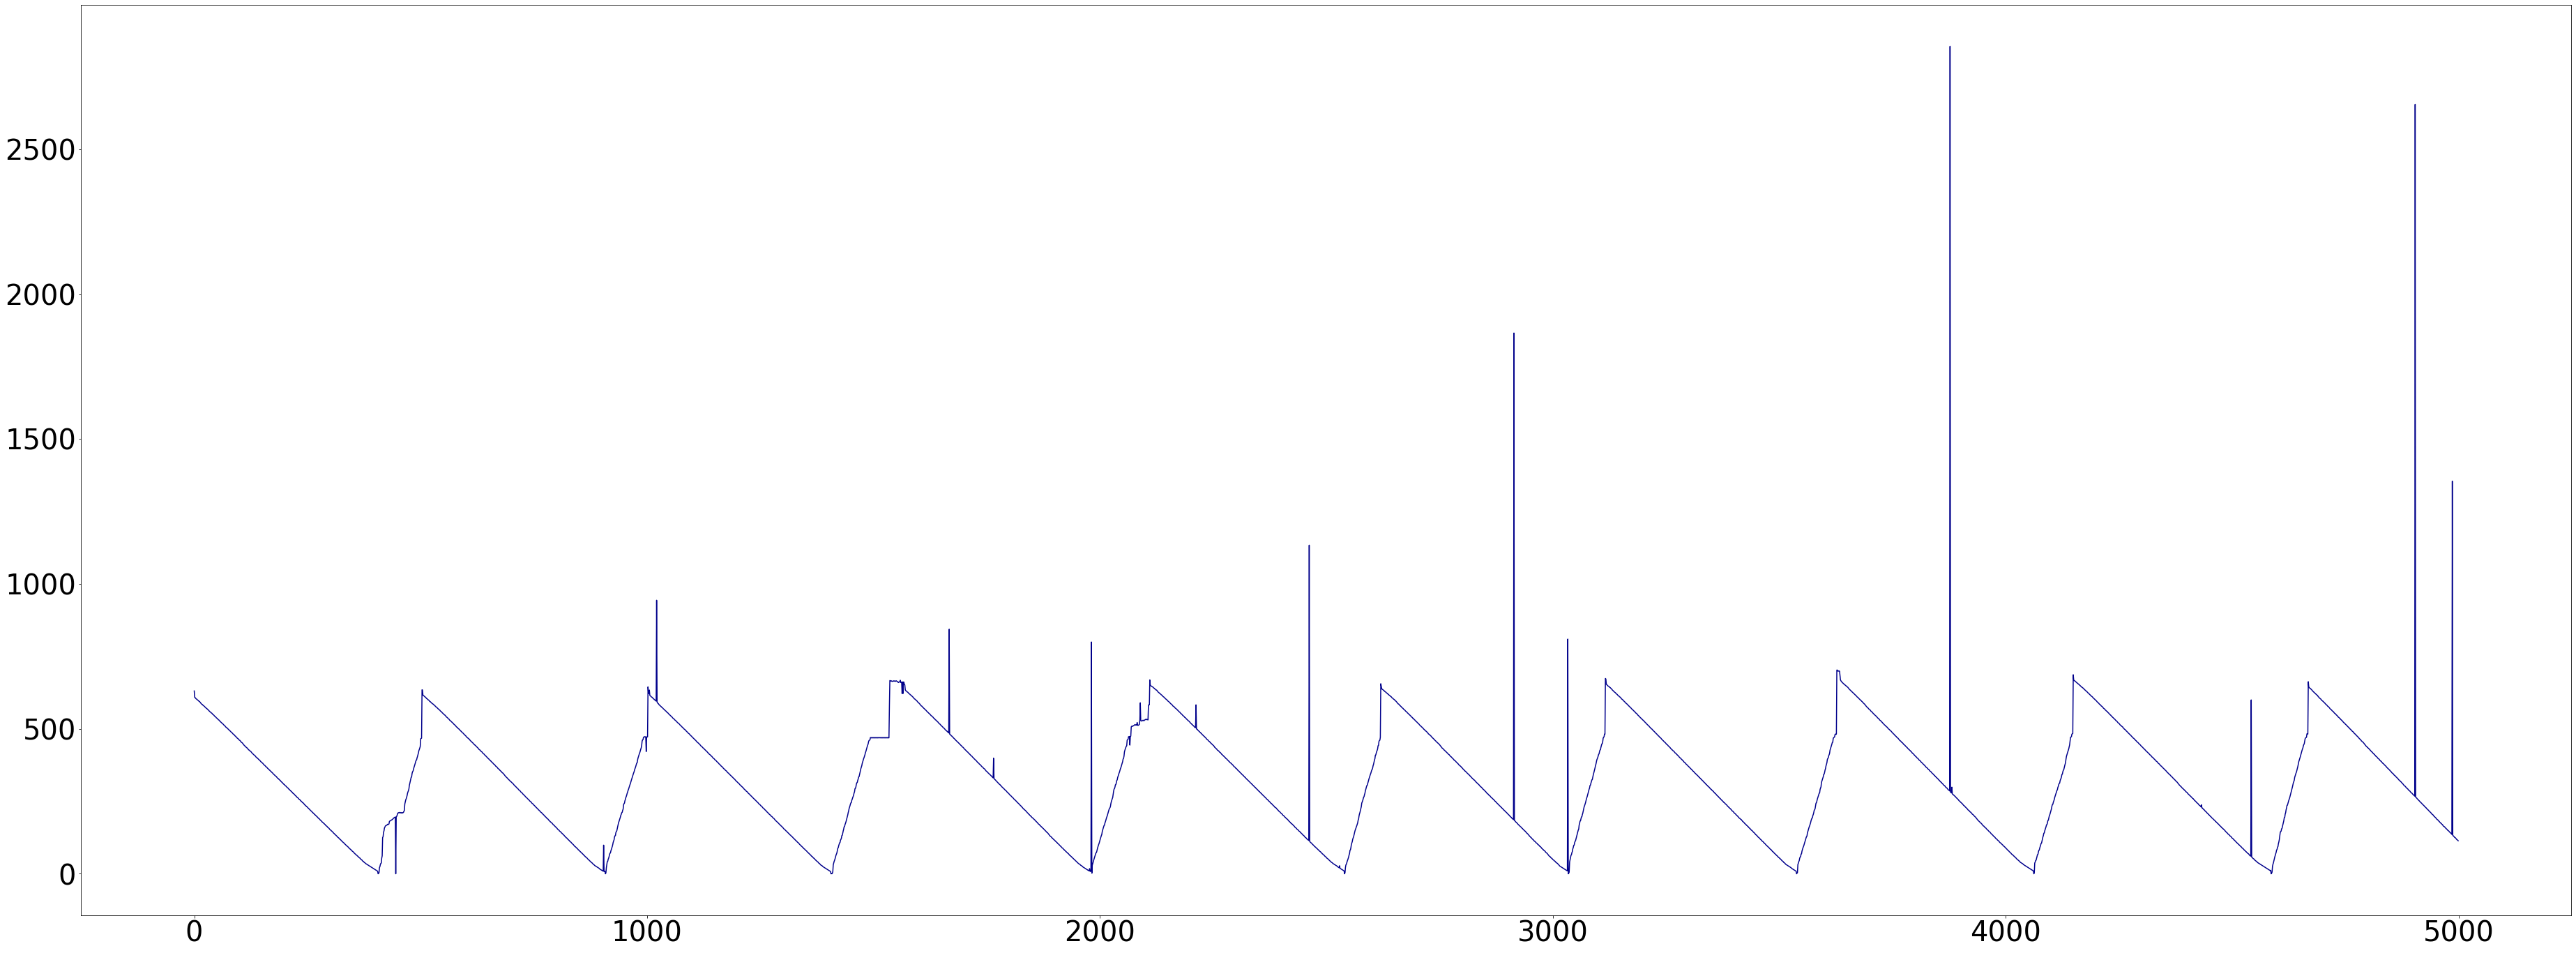

In [10]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][:5000], color='darkblue')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

In [11]:
df

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631.0,3.19,OK
1,2020-03-04 0:00,1,433,78,609.0,3.19,OK
2,2020-03-04 0:00,2,464,154,608.0,3.19,OK
3,2020-03-04 0:00,3,379,212,606.0,3.19,OK
4,2020-03-04 0:00,4,798,1736,604.0,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318.0,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317.0,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316.0,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314.0,3.19,OK


# MELT_WEIGHT 2차 전처리

In [12]:
# 2차-1 4분위수 활용 
# Q3+1.5*IQR 이상 Q1-1.5*IQR 이하 null 처리
for i in range(0, len(df), 100):
    eda_2 = df['MELT_WEIGHT'].loc[i:i+99]
    q1 = eda_2.describe()['25%']
    q3 = eda_2.describe()['75%']
    iqr = q3 - q1
    lowest = q1 - 1.5*iqr
    highest = q3 + 1.5*iqr
    for j in range(len(eda_2)):
        if df['MELT_WEIGHT'][i+j] > highest:
            df['MELT_WEIGHT'][i+j] = np.NAN
        
        elif df['MELT_WEIGHT'][i+j] < lowest:
            df['MELT_WEIGHT'][i+j] = np.NAN

<ipython-input-12-a68a2ea8ee0a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i+j] = np.NAN
<ipython-input-12-a68a2ea8ee0a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i+j] = np.NAN


In [13]:
df[df['MELT_WEIGHT'].isnull()].index

Int64Index([  1021,   1667,   1981,   2462,   2600,   2601,   2602,   2603,
              2604,   2605,
            ...
            833215, 833216, 834292, 834293, 834294, 834295, 834296, 834297,
            834298, 834299],
           dtype='int64', length=15138)

In [14]:
df.loc[[  1021,   1667,   1981,   2462,   2600,   2601,   2602,   2603,
              2604,   2605,
            833215, 833216, 834292, 834293, 834294, 834295, 834296, 834297,
            834298, 834299]]

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
1021,2020-03-04 1:42,1021,435,102,NaN,3.19,OK
1667,2020-03-04 2:46,1667,471,144,NaN,3.20,OK
1981,2020-03-04 3:18,1981,456,85,NaN,3.19,OK
2462,2020-03-04 4:06,2462,458,141,NaN,3.19,OK
2600,2020-03-04 4:20,2600,515,139,NaN,3.19,OK
2601,2020-03-04 4:20,2601,406,74,NaN,3.18,OK
2602,2020-03-04 4:20,2602,493,169,NaN,3.19,OK
2603,2020-03-04 4:20,2603,433,205,NaN,3.19,OK
2604,2020-03-04 4:20,2604,728,1717,NaN,3.21,OK
2605,2020-03-04 4:20,2605,774,1746,NaN,3.22,OK


In [15]:
df['MELT_WEIGHT'].isna().sum()

15138

In [16]:
# 2차-2 null data를 앞, 뒤 data의 평균값으로 대체
for i in range(1, len(df)-1):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = (df['MELT_WEIGHT'][i-1] + df['MELT_WEIGHT'][i+1])/2

<ipython-input-16-cbc6319c3135>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = (df['MELT_WEIGHT'][i-1] + df['MELT_WEIGHT'][i+1])/2


In [17]:
df['MELT_WEIGHT'].isna().sum()

7629

In [18]:
# 2차-3 null data를 앞 data의 값으로 대체
for i in range(1, len(df)):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i-1]

<ipython-input-18-2c4bbbe233eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i-1]


In [19]:
df['MELT_WEIGHT'].isna().sum()

0

In [20]:
# 2차-4 null data를 뒤 data의 값으로 대체
for i in range(0, len(df)-1):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i+1]

In [21]:
df['MELT_WEIGHT'].isna().sum()

0

In [22]:
df.loc[[  1021,   1667,   1981,   2462,   2600,   2601,   2602,   2603,
              2604,   2605,
            833215, 833216, 834292, 834293, 834294, 834295, 834296, 834297,
            834298, 834299]]

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
1021,2020-03-04 1:42,1021,435,102,594.5,3.19,OK
1667,2020-03-04 2:46,1667,471,144,484.0,3.20,OK
1981,2020-03-04 3:18,1981,456,85,5.5,3.19,OK
2462,2020-03-04 4:06,2462,458,141,113.5,3.19,OK
2600,2020-03-04 4:20,2600,515,139,353.0,3.19,OK
2601,2020-03-04 4:20,2601,406,74,353.0,3.18,OK
2602,2020-03-04 4:20,2602,493,169,353.0,3.19,OK
2603,2020-03-04 4:20,2603,433,205,353.0,3.19,OK
2604,2020-03-04 4:20,2604,728,1717,353.0,3.21,OK
2605,2020-03-04 4:20,2605,774,1746,353.0,3.22,OK


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

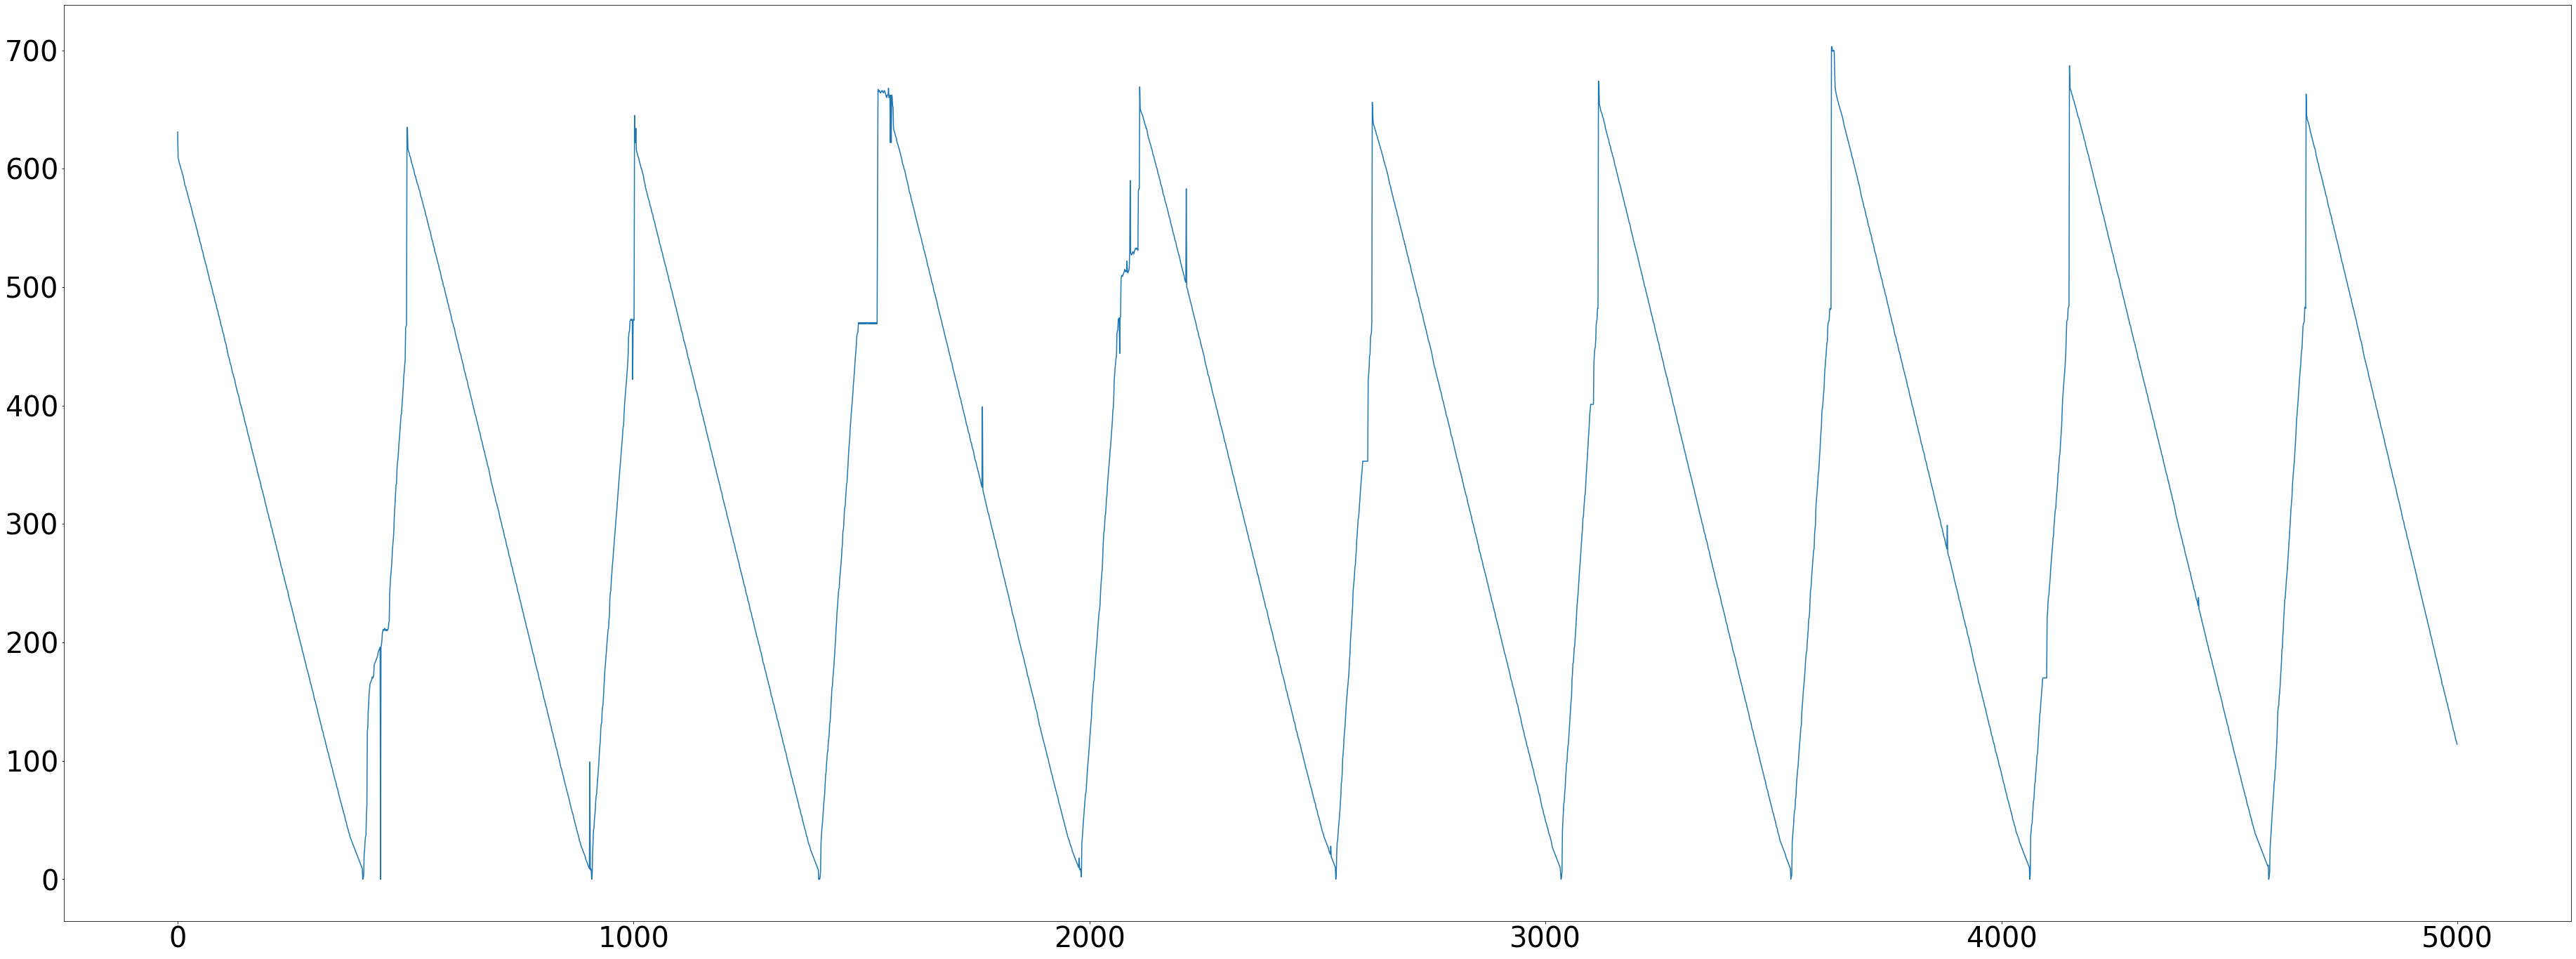

In [23]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][:5000])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

# MELT_WEIGHT 3차 전처리

In [24]:
# MELT_WEIGHT data 한 칸씩 이동
df['MELT_WEIGHT_SHIFT'] = df['MELT_WEIGHT'].shift(1)
df

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG,MELT_WEIGHT_SHIFT
0,2020-03-04 0:00,0,489,116,631.0,3.19,OK,NaN
1,2020-03-04 0:00,1,433,78,609.0,3.19,OK,631.0
2,2020-03-04 0:00,2,464,154,608.0,3.19,OK,609.0
3,2020-03-04 0:00,3,379,212,606.0,3.19,OK,608.0
4,2020-03-04 0:00,4,798,1736,604.0,3.21,OK,606.0
...,...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318.0,3.21,OK,319.0
835196,2020-04-30 23:59,835196,385,206,317.0,3.19,OK,318.0
835197,2020-04-30 23:59,835197,465,148,316.0,3.20,OK,317.0
835198,2020-04-30 23:59,835198,467,0,314.0,3.19,OK,316.0


In [25]:
# MELT_WEIGHT 원래 data와 이동 data 차이 column 생성
df['diff'] = df['MELT_WEIGHT'] - df['MELT_WEIGHT_SHIFT']
df

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG,MELT_WEIGHT_SHIFT,diff
0,2020-03-04 0:00,0,489,116,631.0,3.19,OK,NaN,NaN
1,2020-03-04 0:00,1,433,78,609.0,3.19,OK,631.0,-22.0
2,2020-03-04 0:00,2,464,154,608.0,3.19,OK,609.0,-1.0
3,2020-03-04 0:00,3,379,212,606.0,3.19,OK,608.0,-2.0
4,2020-03-04 0:00,4,798,1736,604.0,3.21,OK,606.0,-2.0
...,...,...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318.0,3.21,OK,319.0,-1.0
835196,2020-04-30 23:59,835196,385,206,317.0,3.19,OK,318.0,-1.0
835197,2020-04-30 23:59,835197,465,148,316.0,3.20,OK,317.0,-1.0
835198,2020-04-30 23:59,835198,467,0,314.0,3.19,OK,316.0,-2.0


In [26]:
# 3차-1 차이가 1000보다 크거나 -1000보다 작으면 null 값으로 대체
for i in range(1, len(df)):
    if df['diff'][i] >= 1000:
        df['MELT_WEIGHT'][i] = np.NAN
        
    elif df['diff'][i] <= -1000:
        df['MELT_WEIGHT'][i] = np.NAN

<ipython-input-26-134a0491f696>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = np.NAN
<ipython-input-26-134a0491f696>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = np.NAN


In [27]:
df['MELT_WEIGHT'].isna().sum()

29

In [28]:
df[df['MELT_WEIGHT'].isnull()].index

Int64Index([222863, 272214, 273716, 418247, 419829, 423015, 524996, 525000,
            526602, 527708, 529149, 529163, 529164, 529165, 529166, 529174,
            529175, 529190, 529191, 530748, 631442, 631449, 631450, 633160,
            633168, 633169, 633184, 633185, 814363],
           dtype='int64')

In [29]:
df.loc[[222863, 272214, 273716, 418247, 419829, 423015, 524996, 525000,
            526602, 527708, 529149, 529163, 529164, 529165, 529166, 529174,
            529175, 529190, 529191, 530748, 631442, 631449, 631450, 633160,
            633168, 633169, 633184, 633185, 814363]]

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG,MELT_WEIGHT_SHIFT,diff
222863,2020-03-19 11:26,222863,377,190,NaN,3.18,NG,486.0,1210.0
272214,2020-03-22 21:41,272214,747,1711,NaN,3.22,OK,929.0,1053.0
273716,2020-03-23 0:11,273716,406,191,NaN,3.18,NG,475.0,1488.0
418247,2020-04-02 1:04,418247,477,197,NaN,3.19,OK,475.0,2345.0
419829,2020-04-02 3:42,419829,490,119,NaN,3.19,OK,494.0,1495.0
423015,2020-04-02 9:01,423015,751,1742,NaN,3.21,OK,306.0,1165.0
524996,2020-04-09 10:59,524996,398,213,NaN,3.18,OK,1688.0,-1533.0
525000,2020-04-09 11:00,525000,493,140,NaN,3.19,OK,155.0,1860.0
526602,2020-04-09 13:40,526602,483,143,NaN,3.19,OK,331.0,1081.0
527708,2020-04-09 15:30,527708,460,80,NaN,3.19,NG,317.0,1095.0


In [30]:
# 3차-2 null data를 앞, 뒤 data의 평균값으로 대체
for i in range(1, len(df)-1):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = (df['MELT_WEIGHT'][i-1] + df['MELT_WEIGHT'][i+1])/2

<ipython-input-30-5947c4be2883>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = (df['MELT_WEIGHT'][i-1] + df['MELT_WEIGHT'][i+1])/2


In [31]:
df['MELT_WEIGHT'].isna().sum()

14

In [32]:
# 3차-3 null data를 앞 data의 평균값으로 대체
for i in range(1, len(df)):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i-1]

<ipython-input-32-58c8a8b3f913>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i-1]


In [33]:
df['MELT_WEIGHT'].isna().sum()

0

In [34]:
# 3차-4 null data를 뒤 data의 값으로 대체
for i in range(0, len(df)-1):
    if pd.isnull(df['MELT_WEIGHT'][i]):
        df['MELT_WEIGHT'][i] = df['MELT_WEIGHT'][i+1]

In [35]:
df['MELT_WEIGHT'].isna().sum()

0

In [36]:
df.loc[[222863, 272214, 273716, 418247, 419829, 423015, 524996, 525000,
            526602, 527708, 529149, 529163, 529164, 529165, 529166, 529174,
            529175, 529190, 529191, 530748, 631442, 631449, 631450, 633160,
            633168, 633169, 633184, 633185, 814363]]

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG,MELT_WEIGHT_SHIFT,diff
222863,2020-03-19 11:26,222863,377,190,1069.50,3.18,NG,486.0,1210.0
272214,2020-03-22 21:41,272214,747,1711,1443.00,3.22,OK,929.0,1053.0
273716,2020-03-23 0:11,273716,406,191,1218.00,3.18,NG,475.0,1488.0
418247,2020-04-02 1:04,418247,477,197,1248.00,3.19,OK,475.0,2345.0
419829,2020-04-02 3:42,419829,490,119,1234.50,3.19,OK,494.0,1495.0
423015,2020-04-02 9:01,423015,751,1742,898.00,3.21,OK,306.0,1165.0
524996,2020-04-09 10:59,524996,398,213,921.50,3.18,OK,1688.0,-1533.0
525000,2020-04-09 11:00,525000,493,140,1083.25,3.19,OK,155.0,1860.0
526602,2020-04-09 13:40,526602,483,143,871.00,3.19,OK,331.0,1081.0
527708,2020-04-09 15:30,527708,460,80,864.60,3.19,NG,317.0,1095.0


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

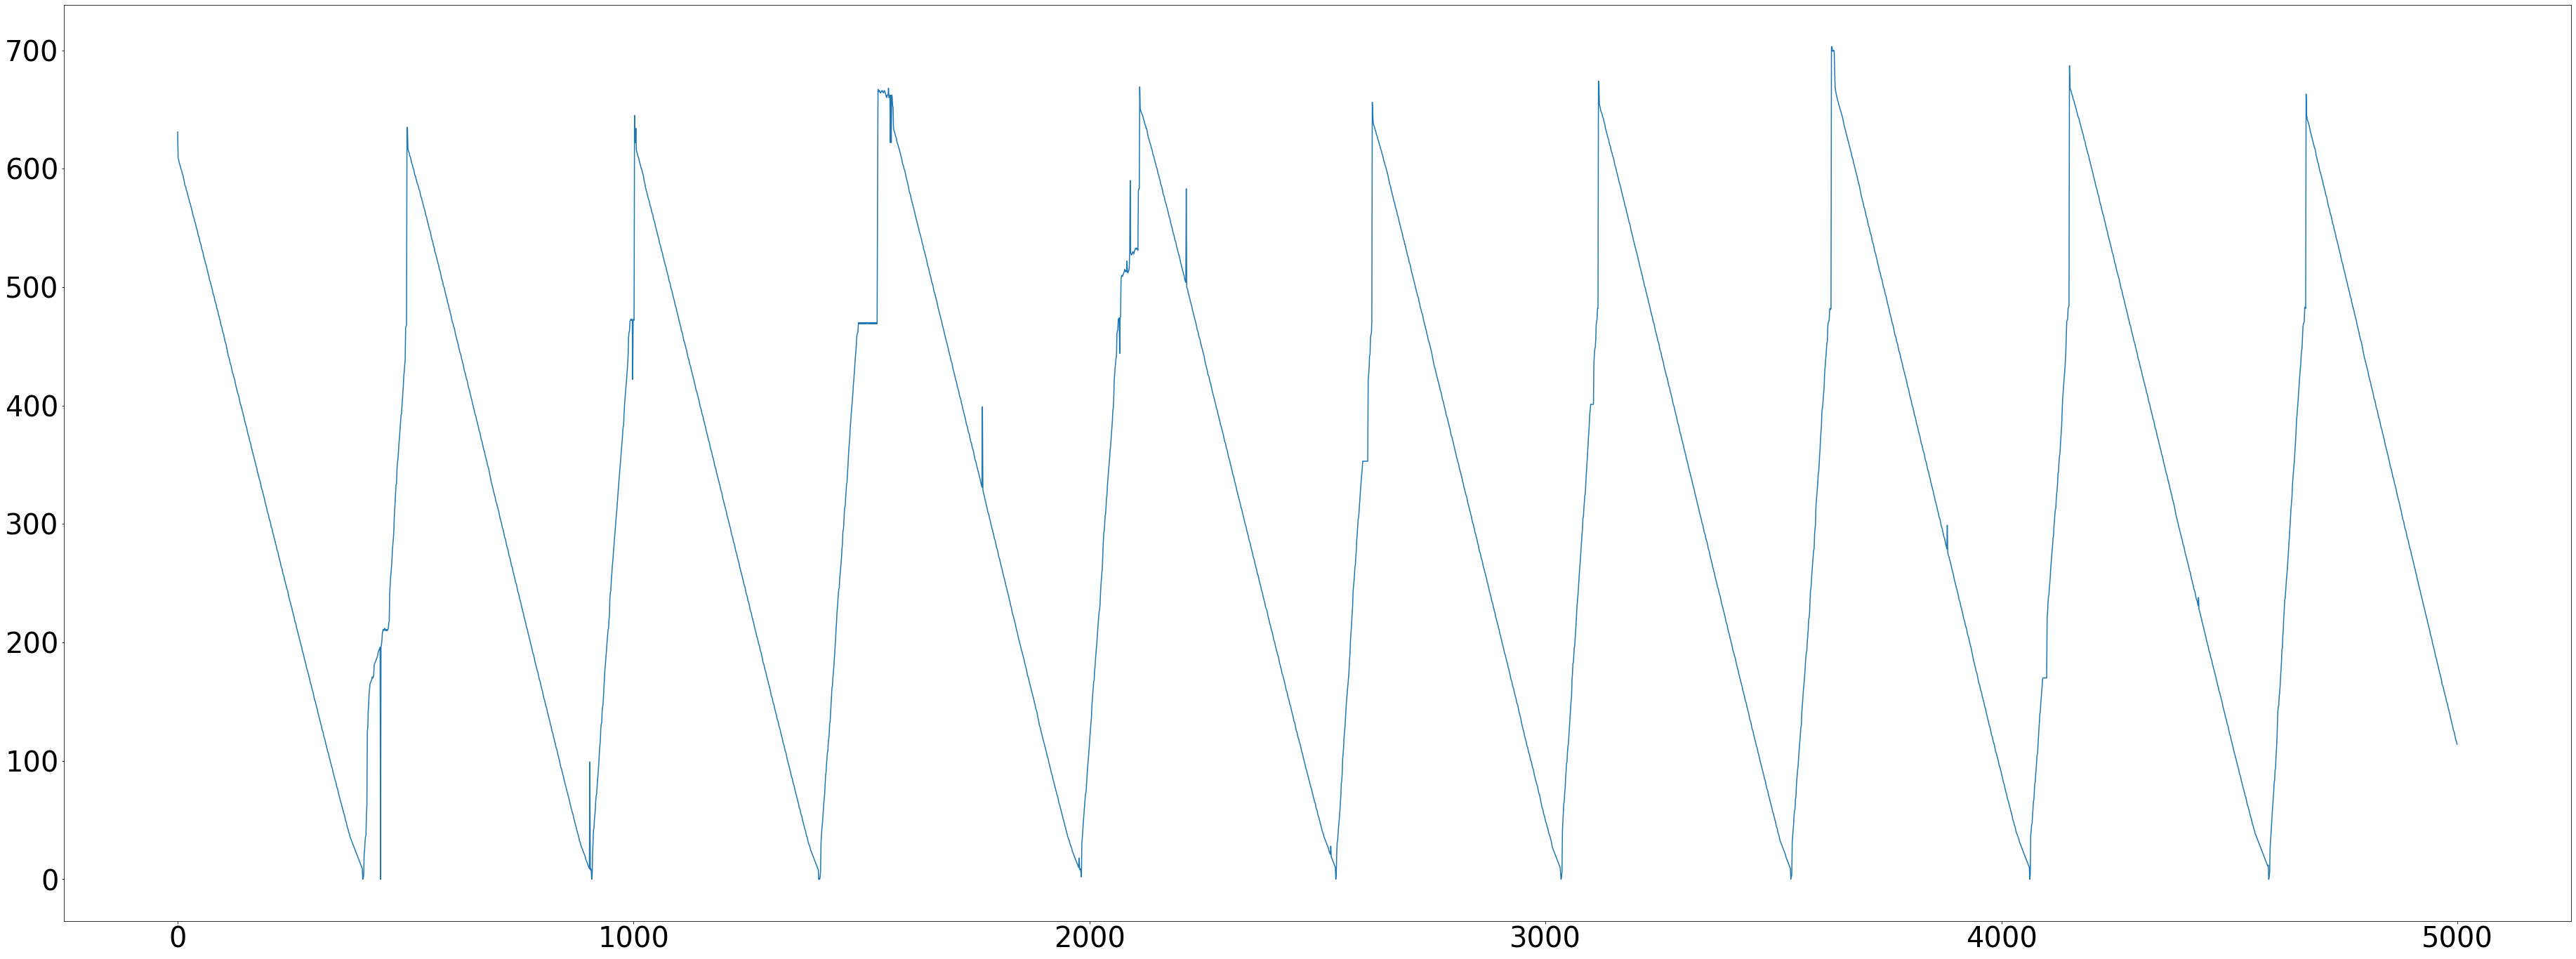

In [37]:
plt.figure(figsize=(64,24))
plt.plot(df['MELT_WEIGHT'][:5000])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)